# Sentiment Analysis Stock Price

- The dataset in consideration is a combination of the world news and stock price shifts available on Kaggle
- There are 25 columns of top news headlines for each day in the data frame
- Data ranges from 2008 to 2016 and the data from 2000 to 2008 was scrapped from Yahoo Finance website
- Labels are based on Dow Jones Industrial Average stock index 
- Class 1 = increase instock price
- Class 0 = the stock price stayed the same or decreased

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('Data.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


- 1 means that the stock price has increased when we've got this particular headlines & 0 means that the stock price 
    has decreased when we've got this particular headlines

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101 entries, 0 to 4100
Data columns (total 27 columns):
Date     4101 non-null object
Label    4101 non-null int64
Top1     4101 non-null object
Top2     4101 non-null object
Top3     4101 non-null object
Top4     4101 non-null object
Top5     4101 non-null object
Top6     4101 non-null object
Top7     4101 non-null object
Top8     4101 non-null object
Top9     4101 non-null object
Top10    4101 non-null object
Top11    4101 non-null object
Top12    4101 non-null object
Top13    4101 non-null object
Top14    4101 non-null object
Top15    4101 non-null object
Top16    4101 non-null object
Top17    4101 non-null object
Top18    4101 non-null object
Top19    4101 non-null object
Top20    4101 non-null object
Top21    4101 non-null object
Top22    4101 non-null object
Top23    4100 non-null object
Top24    4098 non-null object
Top25    4098 non-null object
dtypes: int64(1), object(26)
memory usage: 865.1+ KB


In [6]:
df.describe()

,Label
count,4101.000000
mean,0.528164
std,0.499267
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
df.isnull().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [8]:
# Feature with null values and % of null values
features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().sum(), 4), '% of missing values')

Top24 3 % of missing values
Top25 3 % of missing values


In [9]:
# Checking for categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print('The categorical features are : ', categorical_features)

The categorical features are :  ['Date', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25']


In [10]:
# Checking for numerical features
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('The numerical feature are : ', numerical_features)

The numerical feature are :  ['Label']


In [11]:
# Checking number of ones and zeros inside the label column
df['Label'].value_counts()

1    2166
0    1935
Name: Label, dtype: int64

In [12]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [13]:
# Removing punctuation from the dataset

data = train.iloc[:, 2:27]
# Replacing punctuations with blank spaces
data.replace('[^a-zA-Z]', ' ', regex=True, inplace=True)

# Renaming the column names for ease of access

list_1 = [i for i in range(25)]
new_index = [str(i) for i in list_1]
data.columns = new_index
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A hindrance to operations extracts from the...,Scorecard,Hughes instant hit buoys Blues,Jack gets his skates on at ice cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar s debut double,Southgate strikes Leeds pay the penalty,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl s successor drawn into scandal,The difference between men and women,Sara Denver nurse turned solicitor,Diana s landmine crusade put Tories in a panic,Yeltsin s resignation caught opposition flat f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader German sleaze inquiry,Cheerio boyo,The main recommendations,Has Cubie killed fees,Has Cubie killed fees,Has Cubie killed fees,Hopkins furious at Foster s lack of Hannibal...,Has Cubie killed fees,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man s extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn t know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United s rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne Australia,Necaxa Mexico,Real Madrid Spain,Raja Casablanca Morocco,Corinthians Brazil,Tony s pet project,Al Nassr Saudi Arabia,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,Auntie back in fashion even if the dress look...,Shoaib appeal goes to the top,Hussain hurt by shambles but lays blame on e...,England s decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for,Christmas glitches,Upending a table Chopping a line and Scoring ...,Scientific evidence unreliable defence claims,Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake up of failing NHS,Lessons of law s hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers are you all whingers,Hollywood Beyond,Ashes and diamonds,Whingers a formidable minority,Alan Parker part two,Thuggery Toxins and Ties,...,Most everywhere UDIs,Most wanted Chloe lunettes,Return of the cane completely off the agenda,From Sleepy Hollow to Greeneland,Blunkett outlines vision for over s,Embattled Dobson attacks play now pay later ...,Doom and the Dome,What is the north south divide,Aitken released from jail,Gone aloft


In [14]:
# COnverting the headlines into lower case(very important step)

for index in new_index:
    data[index] = data[index].str.lower()
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,...,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jail,gone aloft


In [15]:
# To apply Bag Of Words or TF-IDF we need to convert all the news inside the column and make it as one paragraph

headlines = []

for row in range(0, len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

In [16]:
headlines[0]

'a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title'

# Applying Bag Of Words & Random Forest Classifier

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [18]:
# Implementing Bag Of Words
count_vector = CountVectorizer(ngram_range=(2,2))
train_dataset = count_vector.fit_transform(headlines)

In [19]:
# Implementing Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=200, criterion='entropy')
rfc.fit(train_dataset, train['Label'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
# Converting test dataset as well into paragraph
test_transform = []

for row in range(0, len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [21]:
# Applying Count vectorizer for test datset as well

test_dataset = count_vector.transform(test_transform)

In [22]:
test_dataset

<378x584289 sparse matrix of type '<class 'numpy.int64'>'
	with 134576 stored elements in Compressed Sparse Row format>

In [23]:
predictions = rfc.predict(test_dataset)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [25]:
conf_matrix = confusion_matrix(test['Label'], predictions)
print(conf_matrix)

acc_score = accuracy_score(test['Label'], predictions)
print('The accuracy is :', acc_score)

[[141  45]
 [  7 185]]
The accuracy is : 0.8624338624338624


# Applying naive bayes classifier

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
classifier_multinomial = MultinomialNB()

# Hyperparamet tuning for MultiNomialNB

In [28]:
classifier_multinomial = MultinomialNB(alpha=0.1)

In [29]:
precision_score = 0

# we are taking values from 0 to 1 with an increment of 0.1

for alpha in np.arange(0,1,0.1):
    sub_multinomial_classifier = MultinomialNB(alpha=alpha)
    sub_multinomial_classifier.fit(train_dataset, train['Label'])
    y_pred = sub_multinomial_classifier.predict(test_dataset)
    score = accuracy_score(test['Label'], y_pred)
    
    
    if score > precision_score:
        sub_multinomial_classifier = classifier_multinomial
        print("Aplha is : {} & Accuracy is : {} %".format(alpha, score))

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Aplha is : 0.0 & Accuracy is : 0.828042328042328 %
Aplha is : 0.1 & Accuracy is : 0.8386243386243386 %
Aplha is : 0.2 & Accuracy is : 0.8412698412698413 %
Aplha is : 0.30000000000000004 & Accuracy is : 0.8386243386243386 %
Aplha is : 0.4 & Accuracy is : 0.8465608465608465 %
Aplha is : 0.5 & Accuracy is : 0.8412698412698413 %
Aplha is : 0.6000000000000001 & Accuracy is : 0.843915343915344 %
Aplha is : 0.7000000000000001 & Accuracy is : 0.8412698412698413 %
Aplha is : 0.8 & Accuracy is : 0.8412698412698413 %
Aplha is : 0.9 & Accuracy is : 0.8465608465608465 %


In [30]:
classifier_multinomial = MultinomialNB(alpha=0.4)

In [31]:
classifier_multinomial.fit(train_dataset, train['Label'])

MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True)

In [32]:
multinomial_pred = classifier_multinomial.predict(test_dataset)

In [33]:
multinomial_accuracy = accuracy_score(test['Label'], multinomial_pred)
print(multinomial_accuracy)

0.8465608465608465


In [34]:
from sklearn.metrics import f1_score

In [35]:
f1_score = f1_score(test['Label'], multinomial_pred)

In [36]:
f1_score

0.8599033816425121

In [37]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(classifier_multinomial, train_dataset, train['Label'], cv=5)
cvs.mean()

0.48553521452931053

In [38]:
count_vector.get_feature_names()[:20]

['aa contract',
 'aa jeanette',
 'aa milne',
 'aa pakistan',
 'aa staff',
 'aa tries',
 'aaa credit',
 'aaa rating',
 'aaa seal',
 'aaa to',
 'aaaw nice',
 'aab in',
 'aabo was',
 'aadmi party',
 'aafia disappeared',
 'aafia siddiqui',
 'aah bbc',
 'aah camara',
 'aah fat',
 'aali where']

In [39]:
count_vector.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (2, 2),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

# Applying Decision Tree algorithm

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
dtree = DecisionTreeClassifier()

In [42]:
DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Hyperparameter Tuning for Decision Tree Algorithm

In [43]:
from sklearn.model_selection import RandomizedSearchCV

In [44]:

params={
 "splitter"    : ["best","random"] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_samples_leaf" : [ 1,2,3,4,5 ],
"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4],
 "max_features" : ["auto","log2","sqrt",None ],
    "max_leaf_nodes":[None,10,20,30,40,50,60,70],
    "criterion" : ["gini", "entropy"]    
}

In [45]:
random_search = RandomizedSearchCV(estimator=dtree, param_distributions=params,cv=10, n_jobs=-1, verbose=3)

In [46]:
random_search.fit(train_dataset, train['Label'])

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'splitter': ['best', 'random'], 'max_depth': [3, 4, 5, 6, 8, 10, 12, 15], 'min_samples_leaf': [1, 2, 3, 4, 5], 'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4], 'max_features': ['auto', 'log2', 'sqrt', None], 'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70], 'criterion': ['gini', 'entropy']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=3)

In [47]:
random_search.get_params()

{'cv': 10,
 'error_score': 'raise-deprecating',
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__presort': False,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False, random_state=None,
             splitter='best'),
 'fit_params': None,
 'iid': 'warn',
 'n_iter': 10,
 'n_jobs': -1,
 'param_distributions': {'splitter': ['best', 'random

In [48]:
random_search.best_params_

{'splitter': 'random',
 'min_weight_fraction_leaf': 0.4,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 30,
 'max_features': 'auto',
 'max_depth': 3,
 'criterion': 'entropy'}

In [49]:
random_search.best_score_

0.5272955974842767

In [58]:
dtree =DecisionTreeClassifier(criterion='gini',splitter='random', max_depth=12, min_samples_leaf=3, 
                             min_weight_fraction_leaf=0.3, max_features='log2')

In [59]:
dtree.fit(train_dataset, train['Label'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.3, presort=False, random_state=None,
            splitter='random')

In [60]:
dtree_predictions = dtree.predict(test_dataset)

In [61]:
dtree_accuracy = accuracy_score(test['Label'], dtree_predictions)

In [62]:
print(dtree_accuracy)

0.5079365079365079


Confusion matrix, without normalization


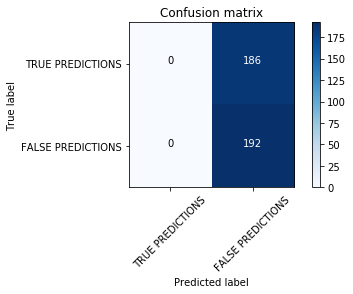

In [78]:
dtree_conf_matrix = confusion_matrix(test['Label'], dtree_predictions)
plot_confusion_matrix(dtree_conf_matrix, classes=['TRUE PREDICTIONS', 'FALSE PREDICTIONS'])

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Applying Passive Aggressive Algorithm

In [74]:
from sklearn.linear_model import PassiveAggressiveClassifier
import itertools

In [75]:
pac = PassiveAggressiveClassifier(n_iter=50)

/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/akhil/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


The Accuracy is : 0.8492063492063492
Confusion matrix, without normalization


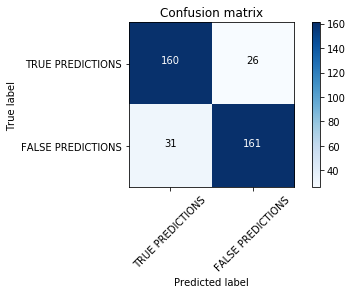

In [77]:
pac.fit(train_dataset, train['Label'])
pac_predict = pac.predict(test_dataset)
pac_score = accuracy_score(test['Label'], pac_predict)
print('The Accuracy is : {}'.format(pac_score))
pac_conf_matrix = confusion_matrix(test['Label'], pac_predict)
plot_confusion_matrix(pac_conf_matrix, classes=['TRUE PREDICTIONS', 'FALSE PREDICTIONS'])